<a href="https://colab.research.google.com/github/venuvardhan22/PRODIGY_DS_04/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [48]:
train_data = pd.read_csv('twitter_training.csv')
train_data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [49]:
col_names = ['Id','Region','Sentiment','Comments']
train_data.columns = col_names

In [50]:
train_data = train_data.drop(['Id','Region'],axis=1)

In [51]:
train_data.dropna(subset=['Comments'],inplace=True)

In [47]:

train_data['Comments'] = train_data['Comments'].str.replace(r'\d+', '')
train_data

<ipython-input-47-b926c49a469a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['Comments'] = train_data['Comments'].str.replace(r'\d+', '')


,Sentiment,Comments
10,Positive,was
28,Negative,the biggest dissappoinment in my life came bac...
52,Neutral,all
113,Negative,All the Borderlands are fuckin trash
114,Negative,All the Borderlands are damn rubbish
...,...,...
74464,Negative,can someone please tell me what NvModuleTracke...
74506,Neutral,You
74590,Neutral,you
74596,Positive,from


In [55]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

df = train_data

def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'\d+', '', text)

    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word,pos="v") for word in tokens]

    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

df['Comments'] = df['Comments'].apply(preprocess_text)

df.to_csv('preprocessed_data.csv', index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [56]:

data = pd.read_csv('preprocessed_data.csv')
data

,Sentiment,Comments
0,Positive,come border kill
1,Positive,im get borderland kill
2,Positive,im come borderland murder
3,Positive,im get borderland murder
4,Positive,im get borderland murder
...,...,...
73990,Positive,realize window partition mac like year behind ...
73991,Positive,realize mac window partition year behind nvidi...
73992,Positive,realize window partition mac year behind nvidi...
73993,Positive,realize window partition mac like year behind ...


In [58]:
data['Comments'].fillna('',inplace=True)

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Comments'])
X_train, X_test, y_train, y_test = train_test_split(X, data['Sentiment'], test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', round(accuracy*100,2),'%')



Accuracy: 75.15 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


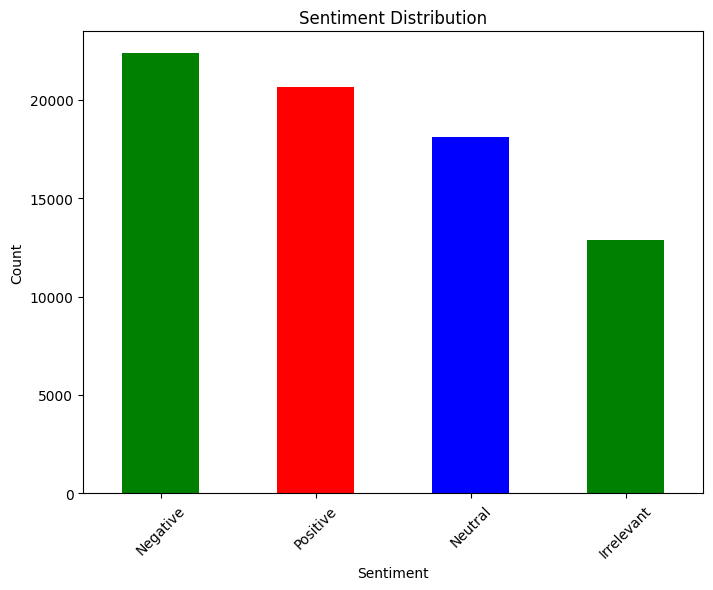

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('preprocessed_data.csv')

sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [7]:
val_data = pd.read_csv('twitter_validation.csv')
val_data

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [63]:
col_names = ['Id','Station','Sentiment','Comments']
val_data.columns = col_names

In [64]:
val_data = val_data.drop(['Id','Station'],axis=1)

In [65]:
val_data.dropna(subset=['Comments'],inplace=True)

In [66]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

df_2 = val_data

def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'\d+', '', text)

    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word,pos="v") for word in tokens]

    preprocessed_text = ' '.join(tokens)

    return preprocessed_text
df_2['Comments'] = df_2['Comments'].apply(preprocess_text)
df_2.to_csv('preprocessed_data2.csv', index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [67]:
data2 = pd.read_csv('preprocessed_data2.csv')
data2

,Sentiment,Comments
0,Neutral,bbc news amazon boss jeff bezos reject claim c...
1,Negative,microsoft pay word function poorly samsungus c...
2,Negative,csgo matchmaking full closet hack truly awful ...
3,Neutral,president slap americans face really commit un...
4,Negative,hi eahelp ’ madeleine mccann cellar past years...
...,...,...
994,Irrelevant,⭐️ toronto arts culture capital canada ’ wonde...
995,Irrelevant,actually good move tot bring viewers one peopl...
996,Positive,today suck ’ time drink wine n play borderland...
997,Positive,buy fraction microsoft today small win


In [68]:
data2['Comments'].fillna('',inplace=True)

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data2['Comments'])
X_train, X_test, y_train, y_test = train_test_split(X, data2['Sentiment'], test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', round(accuracy*100,2),'%')



Accuracy: 51.5 %


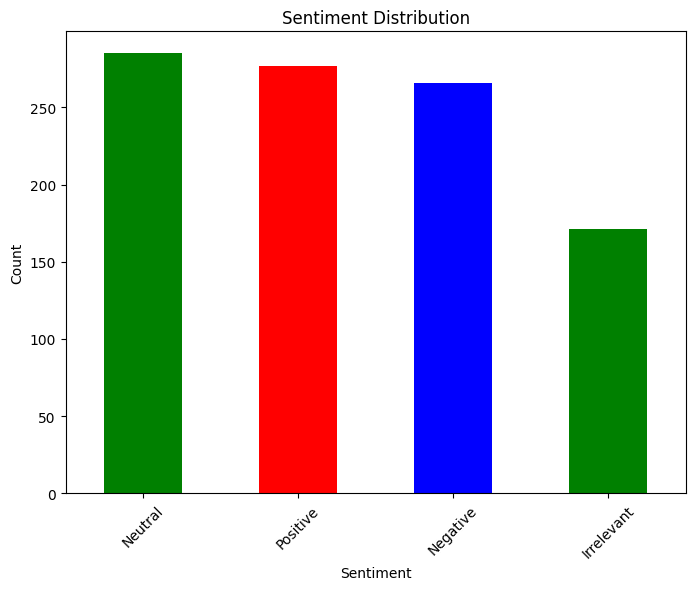

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
df_2 = pd.read_csv('preprocessed_data2.csv')
sentiment_counts = df_2['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()